<a href="https://colab.research.google.com/github/sameh00alsharawy/emotion-detection-fer2013/blob/main/emotion_detecton_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf 
from tensorflow import keras

from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

import os
import zipfile

from keras.utils import to_categorical


In [2]:
 ! pip install -q kaggle

In [7]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samehalsharawy","key":"998cf947154a5776bc5cbf887a38c2ab"}'}

In [8]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 6.22MB/s]
 63% 49.0M/77.3M [00:00<00:00, 63.1MB/s]
100% 77.3M/77.3M [00:00<00:00, 143MB/s] 
 96% 88.0M/92.0M [00:00<00:00, 106MB/s] 
100% 92.0M/92.0M [00:00<00:00, 172MB/s]
 96% 93.0M/96.6M [00:00<00:00, 67.6MB/s]
100% 96.6M/96.6M [00:00<00:00, 110MB/s] 
 88% 17.0M/19.3M [00:01<00:00, 13.4MB/s]
100% 19.3M/19.3M [00:01<00:00, 19.0MB/s]


In [10]:
!pwd
!ls

/content
example_submission.csv	icml_face_data.csv.zip	sample_data   train.csv.zip
fer2013.tar.gz		kaggle.json		test.csv.zip


In [11]:
lz = 'icml_face_data.csv.zip'
with zipfile.ZipFile(lz, 'r') as zip_ref:
    zip_ref.extractall()


In [12]:
data = pd.read_csv('icml_face_data.csv')
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [13]:
data.columns = ['emotion', 'usage', 'pixels']

In [14]:
data['usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: usage, dtype: int64

In [15]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [16]:
def prepare_data (df):
  n = df.shape[0]
  x = np.zeros((n, 48, 48))
  y = df.emotion.values
  for i in range(n):
    x[i,:,:]=np.array([float (x) for x in  df.pixels.values[i].split(' ')]).reshape(48,48)
  return x,y 

In [17]:
x_train, y_train = prepare_data(data[data.usage == "Training"])
x_val,   y_val   = prepare_data(data[data.usage == "PrivateTest"])
x_test,  y_test  = prepare_data(data[data.usage == "PublicTest"])

In [18]:
train_labels = to_categorical(y_train)
val_labels   = to_categorical(y_val)
test_labels  = to_categorical(y_test)
x_test = x_test/255.0
x_train= x_train/255.0
x_val  = x_val/255.0

In [19]:
x_test  = x_test.reshape((x_test.shape[0], 48, 48, 1))
x_val   = x_val.reshape((x_val.shape[0], 48, 48, 1))
x_train = x_train.reshape((x_train.shape[0], 48, 48, 1))

In [20]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [22]:
model2 = keras.Sequential()

model2.add(Conv2D(64, 3, padding='same', input_shape =(48,48,1) ))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.1))

model2.add(Conv2D(64, 3, padding='same', input_shape =(48,48,1) ))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.1))

model2.add(Conv2D(128, 3, padding='same', input_shape =(48,48,1) ))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.1))

model2.add(Conv2D(128, 3, padding='same', input_shape =(48,48,1) ))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.1))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(7, activation='softmax'))

model2.compile(loss = keras.losses.categorical_crossentropy,
               optimizer = 'adam',
               metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 64)       

In [23]:
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',mode='max',factor=0.5, patience=7, min_lr=0.00005, verbose=1)

history2 = model2.fit( 
    x= x_train,
    y= train_labels,
    batch_size=265,
    epochs=100,
    validation_data = (x_val, val_labels),
    callbacks=[rlrop]
)


Epoch 1/100
109/109 [==============================] - 5s 47ms/step - loss: 1.7658 - accuracy: 0.3401 - val_loss: 2.1834 - val_accuracy: 0.2449
Epoch 2/100
109/109 [==============================] - 5s 43ms/step - loss: 1.4348 - accuracy: 0.4578 - val_loss: 2.1503 - val_accuracy: 0.2179
Epoch 3/100
109/109 [==============================] - 5s 43ms/step - loss: 1.2964 - accuracy: 0.5096 - val_loss: 1.7319 - val_accuracy: 0.3466
Epoch 4/100
109/109 [==============================] - 5s 43ms/step - loss: 1.1912 - accuracy: 0.5492 - val_loss: 1.4422 - val_accuracy: 0.4280
Epoch 5/100
109/109 [==============================] - 5s 44ms/step - loss: 1.1301 - accuracy: 0.5721 - val_loss: 1.2097 - val_accuracy: 0.5352
Epoch 6/100
109/109 [==============================] - 5s 43ms/step - loss: 1.0677 - accuracy: 0.5993 - val_loss: 1.1983 - val_accuracy: 0.5453
Epoch 7/100
109/109 [==============================] - 5s 44ms/step - loss: 1.0224 - accuracy: 0.6138 - val_loss: 1.3271 - val_accuracy:

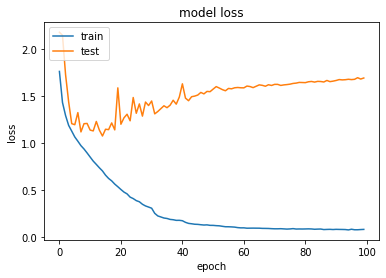

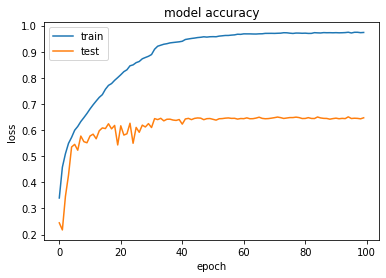

In [24]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model2.evaluate(x_test, test_labels)

113/113 [==============================] - 0s 4ms/step - loss: 1.8502 - accuracy: 0.6336


[1.850225567817688, 0.6336026787757874]

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
model2.save('/content/gdrive/MyDrive/model_cnn.h5')